In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")

In [3]:
# Cleaning unwanted spaces on the data inside the dataset eg double spaces, leading and trailing spaces
def remove_extra_spaces(value):
    if isinstance(value, str):
        return ' '.join(value.split())
    else:
        return value

# Apply the function to the entire DataFrame
data_cleaned = data.applymap(remove_extra_spaces)

# Cleaning unwanted spacea on the column names eg double spaces, leading and trailing spaces
data.columns = data.columns.str.replace(r'\s+', ' ')
data.columns = data.columns.str.strip()

C:\Users\user\AppData\Local\Temp\ipykernel_9440\1215721129.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r'\s+', ' ')


In [4]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [8]:
data = data.join(pd.get_dummies(data.Status)).drop(['Status'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Life expectancy                  1649 non-null   float64
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9   BMI                              1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure   

In [10]:
#Converting Country column to longitude and latitude columns
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(country):
    try:
        location = geolocator.geocode(country)
        if location:
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Error: {e}")
    return None, None

data[['Latitude', 'Longitude']] = data['Country'].apply(lambda x: pd.Series(get_coordinates(x)))

# Drop rows where coordinates couldn't be found
data = data.dropna(subset=['Latitude', 'Longitude'])

Error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Armenia&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000114A22A1B10>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))
Error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Armenia&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000114A22A3990>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))
Error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Armenia&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000114A22B19D0>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))
Error: HTTPSConnectionPool(host='nominatim.ope

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1643 non-null   object 
 1   Year                             1643 non-null   int64  
 2   Life expectancy                  1643 non-null   float64
 3   Adult Mortality                  1643 non-null   float64
 4   infant deaths                    1643 non-null   int64  
 5   Alcohol                          1643 non-null   float64
 6   percentage expenditure           1643 non-null   float64
 7   Hepatitis B                      1643 non-null   float64
 8   Measles                          1643 non-null   int64  
 9   BMI                              1643 non-null   float64
 10  under-five deaths                1643 non-null   int64  
 11  Polio                            1643 non-null   float64
 12  Total expenditure   

In [12]:
data = data.drop(['Country'], axis=1)

In [13]:
data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing,Latitude,Longitude
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1,33.768006,66.238514
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1,33.768006,66.238514
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1,33.768006,66.238514
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1,33.768006,66.238514
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1,33.768006,66.238514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1,-18.455496,29.746841
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1,-18.455496,29.746841
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1,-18.455496,29.746841
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1,-18.455496,29.746841


<Axes: >

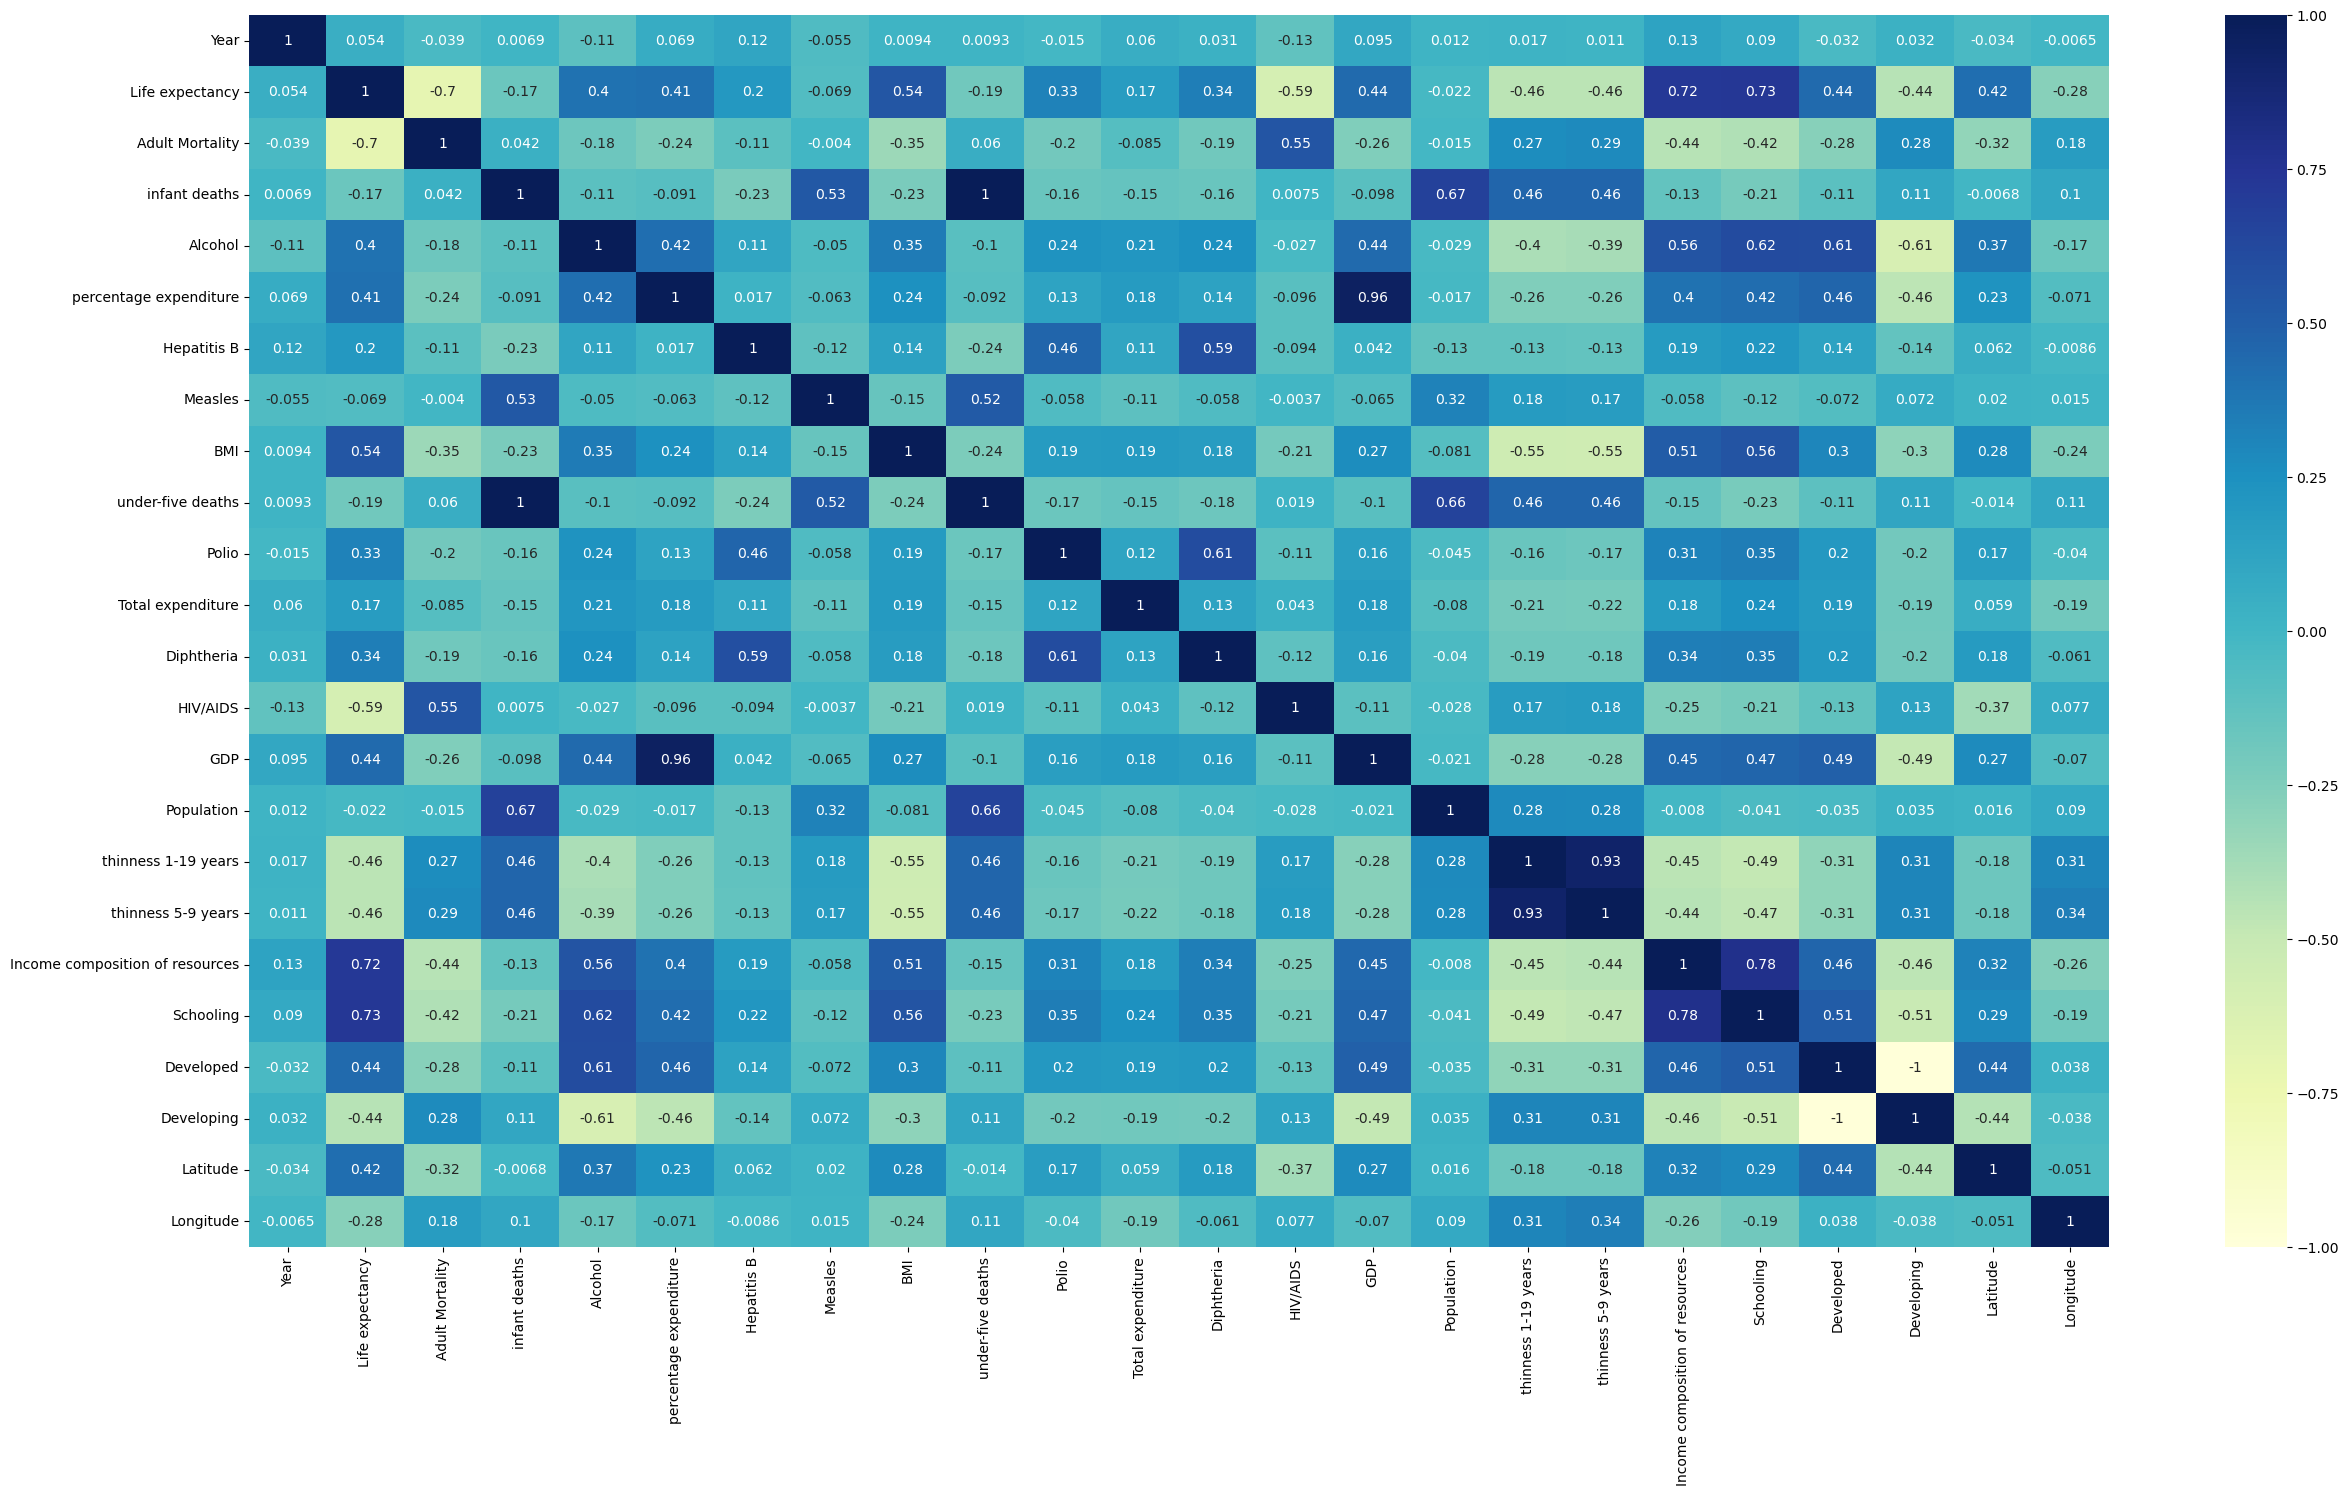

In [14]:
plt.figure(figsize=(30, 16))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Longitude', ylabel='Latitude'>

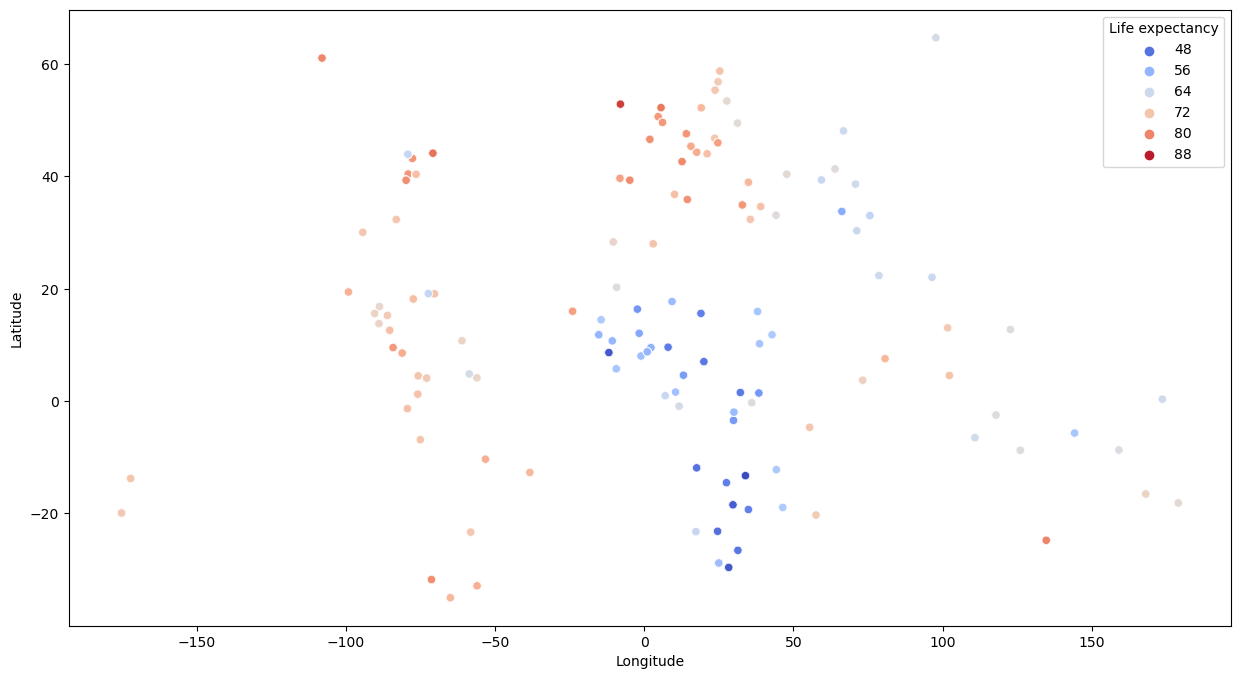

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Longitude", y="Latitude", data = data, hue="Life expectancy", palette="coolwarm")

In [16]:
print(data.columns)

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing', 'Latitude', 'Longitude'],
      dtype='object')


In [17]:
x = data.drop(['Life expectancy'], axis=1)
y = data['Life expectancy']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [19]:
### LINEAR REGRESSION

In [20]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [21]:
x_train

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing,Latitude,Longitude
408,2007,293.0,46,4.58,73.927306,89.0,12,15.1,83,93.0,...,475.111220,1425221.0,9.8,9.3,0.334,4.9,0,1,12.075308,-1.688031
2061,2009,9.0,0,12.03,337.102352,96.0,3,57.3,0,96.0,...,2363.971610,1568247.0,0.7,0.5,0.809,16.0,1,0,39.662165,-8.135352
472,2007,24.0,16,2.08,57.735167,82.0,394,14.8,20,82.0,...,631.675789,13676693.0,11.3,11.5,0.495,10.3,0,1,3.976706,-73.149367
2260,2004,247.0,24,0.35,66.022363,54.0,31,19.1,42,87.0,...,733.581811,1955944.0,11.6,11.5,0.408,6.2,0,1,14.475061,-14.452961
2910,2011,366.0,29,2.57,183.046169,81.0,13234,21.2,44,83.0,...,1644.619672,14264756.0,6.6,6.4,0.543,12.0,0,1,-14.518912,27.558988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,2004,125.0,4,0.54,32.525236,95.0,21,57.0,4,95.0,...,261.456882,5535595.0,3.9,3.8,0.723,13.5,0,1,32.363596,35.561242
1008,2001,92.0,3,12.46,4057.637383,86.0,6024,55.6,4,96.0,...,23687.316890,82349925.0,1.2,1.1,0.860,16.2,1,0,40.420348,-79.116698
1798,2013,232.0,3,0.01,760.655055,89.0,1028,34.1,3,89.0,...,5488.131712,231652.0,9.0,8.9,0.625,11.6,0,1,-23.233550,17.323111
2374,2002,22.0,0,1.08,156.284797,75.0,0,39.6,0,78.0,...,784.956287,435262.0,1.4,1.4,0.446,7.3,0,1,-8.705394,159.107069


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1643 non-null   int64  
 1   Life expectancy                  1643 non-null   float64
 2   Adult Mortality                  1643 non-null   float64
 3   infant deaths                    1643 non-null   int64  
 4   Alcohol                          1643 non-null   float64
 5   percentage expenditure           1643 non-null   float64
 6   Hepatitis B                      1643 non-null   float64
 7   Measles                          1643 non-null   int64  
 8   BMI                              1643 non-null   float64
 9   under-five deaths                1643 non-null   int64  
 10  Polio                            1643 non-null   float64
 11  Total expenditure                1643 non-null   float64
 12  Diphtheria          

In [23]:
reg.score(x_test, y_test)

0.8451886442478014

In [24]:
### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
forest.score(x_test, y_test)

0.9650858416300435

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[49, 50, 51],
    "max_features":[13, 14, 15],
    "min_samples_split":[2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [13, 14, 15],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [49, 50, 51]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
best_forest = grid_search.best_estimator_

In [69]:
best_forest.score(x_test, y_test)

0.9660274577179474